In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
from math import factorial
import scipy.special as spsp

from max_likelihood import ml_gamma

In [2]:
graph_params = {
    'text.latex.preamble': '\\usepackage{gensymb}',
    'text.usetex': True,
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'font.family': 'serif',
    'figure.figsize': [6, 5.5],
    'font.size': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    "figure.facecolor": 'white',
}
plt.rcParams.update(graph_params)

In [3]:
######################################
####### Question 1: Wet days #########
######################################

# Read data from file
data = np.genfromtxt('wetdays.csv', delimiter=',', skip_header=1)
year       = data[:,0]
total_days = data[:,1]
rain_days  = data[:,2]

####### Question 1.1 #######
prob_of_rain = np.sum(rain_days)/np.sum(total_days)
print(f"Using frequentist definition of probability, the probability of a wet day is: {prob_of_rain}")

####### Question 1.2 #######
# Paramters for 1 week are:
N = 7
p = prob_of_rain # = 0.119...

# For three wet days
prob_of_three_wet_days_binom = sps.binom.pmf(k=3, n=N, p=p)
print(f"Binomial probability of having three wet days is: p = {prob_of_three_wet_days_binom}")

# Probability of having, at most, 4 wet days.
# i.e., probability of having 1, 2, 3, 4 wet days
prob_of_four_or_fewer_wet_days_binom = sps.binom.cdf(k=4, n=N, p=p)
print(f"Binomial probability of having four or fewer wet days is: p = {prob_of_four_or_fewer_wet_days_binom}")

# Probability of having 2 or more wet days
# This is the probability of having 2, 3, 4, 5, 6, 7 wet days
prob_of_two_or_more_wet_days_binom = 1 - sps.binom.cdf(k=1, n=N, p=p)
print(f"Binomial probablity of having two or more wet days is: p = {prob_of_two_or_more_wet_days_binom}")

###### Question 1.3 ######
# Poisson distribution
# The only input parameter, mu, is expected number of successes in 1 week
# So, mu = Np = (prob of rain in 1 day) * (7 days)
mu = prob_of_rain*7

# NIST Conditions:
# If the individual probability of success is mu = Np then
print(f"Individual probability of success is Np: {mu}")
print("With N = 7 and p = individual probability of rain on one day")

# For three wet days
prob_of_three_wet_days_poisson = sps.poisson.pmf(k=3, mu=mu)
print(f"Poisson probability of having three wet days is: p = {prob_of_three_wet_days_poisson}")

# Probability of having, at most, 4 wet days.
prob_of_four_or_fewer_wet_days_poisson = sps.poisson.cdf(k=4, mu=mu)
print(f"Poisson probability of having four or fewer wet days is: p = {prob_of_four_or_fewer_wet_days_poisson}")

# Probability of having 2 or more wet days
prob_of_two_or_more_wet_days_poisson = 1 - sps.poisson.cdf(k=1, mu=mu)
print(f"Poisson probablity of having two or more wet days is: p = {prob_of_two_or_more_wet_days_poisson}")

# Compute differences between the binomial and poisson probabilities
# Difference in 3 wet days:
diff_three_wet_days = prob_of_three_wet_days_binom - prob_of_three_wet_days_poisson
print(f"Difference in probability of having three wet days: {diff_three_wet_days}")

# Difference in having at most 4 wet days
diff_four_or_fewer_wet_days = prob_of_four_or_fewer_wet_days_binom - prob_of_four_or_fewer_wet_days_poisson
print(f"Difference in probability of having four or fewer wet days: {diff_four_or_fewer_wet_days}")

# Difference in having 2 or more wet days
diff_two_or_more_wet_days = prob_of_two_or_more_wet_days_binom - prob_of_two_or_more_wet_days_poisson
print(f"Difference in probability of having two or more wet days: {diff_two_or_more_wet_days}")

# Comment on the differences
print("So, it appears that the results compare favourably for both distributions, since the difference")
print("is in the third decimal place.")



Using frequentist definition of probability, the probability of a wet day is: 0.11925378836113587
Binomial probability of having three wet days is: p = 0.035718049303733575
Binomial probability of having four or fewer wet days is: p = 0.9995890242245745
Binomial probablity of having two or more wet days is: p = 0.19924219646098662
Individual probability of success is Np: 0.8347765185279511
With N = 7 and p = individual probability of rain on one day
Poisson probability of having three wet days is: p = 0.04207465725184057
Poisson probability of having four or fewer wet days is: p = 0.9983029295262429
Poisson probablity of having two or more wet days is: p = 0.20375936433111974
Difference in probability of having three wet days: -0.006356607948106996
Difference in probability of having four or fewer wet days: 0.0012860946983316301
Difference in probability of having two or more wet days: -0.004517167870133121
So, it appears that the results compare favourably for both distributions, sinc

In [4]:
###### Question 1.4 ######
# Number of wet days in one year:
N = 365
p = prob_of_rain
print(f"Paramters are: N = {N}, p = {p}")
print(f"Expected value is: {N*p}")

# Binomial probability of having 100 wet days
prob_of_100_wet_days_binom = sps.binom.pmf(k=100, n=N, p=p)
print(f"Probability of having 100 wet days in a year: {prob_of_100_wet_days_binom}")

# Binomial probability of having at most 200 wet days
prob_of_200_or_fewer_wet_days_binom = sps.binom.cdf(k=200, n=N, p=p)
print(f"Probability of having 200 or fewer wet days in a year: {prob_of_200_or_fewer_wet_days_binom}")

# Binomial prob of having at least 50 wet days
# This is 1 - cdf of 49 days
prob_of_50_or_more_wet_days_binom = 1 - sps.binom.cdf(k=49, n=N, p=p)
print(f"Probability of having 50 or more wet days in a year: {prob_of_50_or_more_wet_days_binom}")


###### Question 1.5 #######
# Recalculate the NIST conditions:
mu = prob_of_rain*365
# So, the total Np is:
print(f"Now, N*p is: {mu}")
print("So, N is larger now, but N*p is also larger than recommended")

# Poisson probability of having 100 wet days
prob_of_100_wet_days_poisson = sps.poisson.pmf(k=100, mu=mu)
print(f"Probability of having 100 wet days in a year: {prob_of_100_wet_days_poisson}")

# Poisson probability of having at most 200 wet days
prob_of_200_or_fewer_wet_days_poisson = sps.poisson.cdf(k=200, mu=mu)
print(f"Probability of having 200 or fewer wet days in a year: {prob_of_200_or_fewer_wet_days_poisson}")

# Poisson prob of having at least 50 wet days
# This is 1 - cdf of 49 days
prob_of_50_or_more_wet_days_poisson = 1 - sps.poisson.cdf(k=49, mu=mu)
print(f"Probability of having 50 or more wet days in a year: {prob_of_50_or_more_wet_days_poisson}")

# Compute differences between the binomial and poisson probabilities
# Difference in 100 wet days:
diff_100_wet_days = prob_of_100_wet_days_binom - prob_of_100_wet_days_poisson
print(f"Difference in probability of having 100 wet days: {diff_100_wet_days}")

# Difference in having at most 200 wet days
diff_200_or_fewer_wet_days = prob_of_200_or_fewer_wet_days_binom - prob_of_200_or_fewer_wet_days_poisson
print(f"Difference in probability of having 200 or fewer wet days: {diff_200_or_fewer_wet_days}")

# Difference in having 50 or more wet days
diff_50_or_more_wet_days = prob_of_50_or_more_wet_days_binom - prob_of_50_or_more_wet_days_poisson
print(f"Difference in probability of having 50 or more wet days: {diff_50_or_more_wet_days}")

# Comment on the differences
print("So, difference is smaller than for the weekly case, hence this is a better approximation")

Paramters are: N = 365, p = 0.11925378836113587
Expected value is: 43.52763275181459
Probability of having 100 wet days in a year: 6.017960127290807e-16
Probability of having 200 or fewer wet days in a year: 1.0
Probability of having 50 or more wet days in a year: 0.16688867059639778
Now, N*p is: 43.52763275181459
So, N is larger now, but N*p is also larger than recommended
Probability of having 100 wet days in a year: 1.0062143401078563e-13
Probability of having 200 or fewer wet days in a year: 1.0
Probability of having 50 or more wet days in a year: 0.18130185918052955
Difference in probability of having 100 wet days: -1.0001963799805655e-13
Difference in probability of having 200 or fewer wet days: 0.0
Difference in probability of having 50 or more wet days: -0.014413188584131764
So, difference is smaller than for the weekly case, hence this is a better approximation


In [5]:
graph_params = {
    'figure.figsize': [11, 5.5],
}
plt.rcParams.update(graph_params)

The first graph, for p = 0.11925378836113587 is a good approximation
The second graph, for p = 0.5, is a much worse approximation, since the Poisson approximation
is only really valid for small chances of success
The third graph for p = 0.05 is a much better approximation.


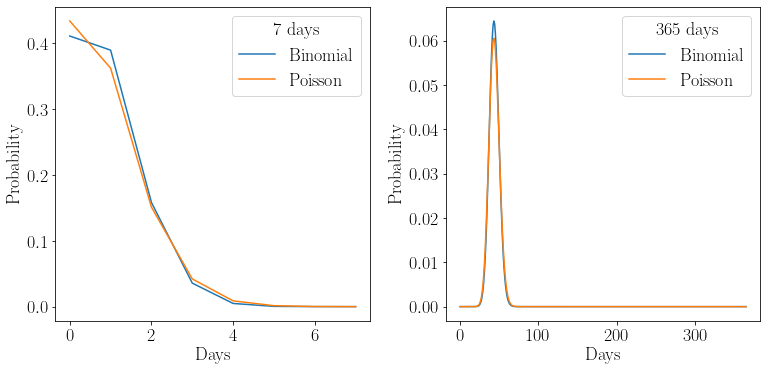

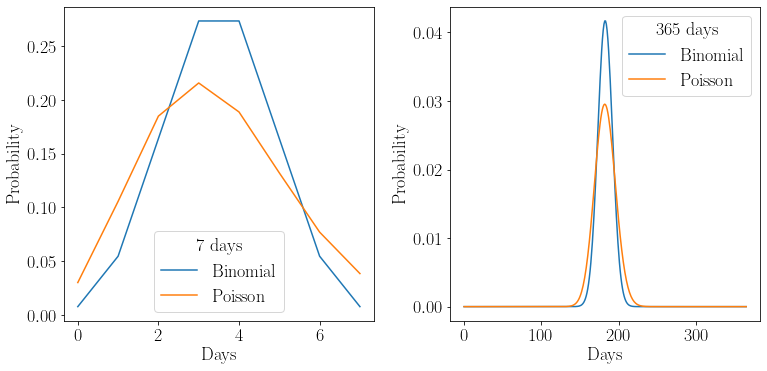

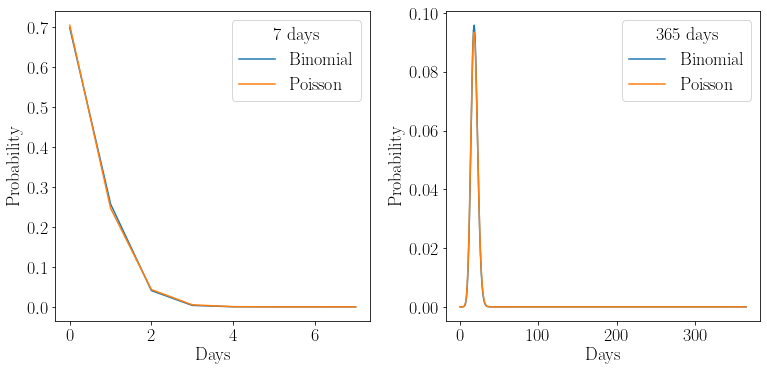

In [6]:
######## Question 1.6 ########

def compare_binomial_and_poisson(p, n1, n2):
    fig, axs = plt.subplots(1,2)

    x1 = np.arange(n1+1)
    binom_7 = sps.binom.pmf(x1, n=n1, p=p)
    poisson_7 = sps.poisson.pmf(x1, mu=p*n1)
    axs[0].plot(x1, binom_7, label='Binomial')
    axs[0].plot(x1, poisson_7, label='Poisson')
    axs[0].set_ylabel("Probability")
    axs[0].set_xlabel("Days")
    axs[0].legend(title='7 days')

    x2 = np.arange(n2+1)
    binom_365 = sps.binom.pmf(x2, n=n2, p=p)
    poisson_365 = sps.poisson.pmf(x2, mu=p*n2)
    axs[1].plot(x2, binom_365, label='Binomial')
    axs[1].plot(x2, poisson_365, label='Poisson')
    axs[1].set_ylabel("Probability")
    axs[1].set_xlabel("Days")
    axs[1].legend(title="365 days")

    plt.tight_layout()

compare_binomial_and_poisson(prob_of_rain, 7, 365)
compare_binomial_and_poisson(0.5, 7, 365)
compare_binomial_and_poisson(0.05, 7, 365)

print(f"The first graph, for p = {prob_of_rain} is a good approximation")
print("The second graph, for p = 0.5, is a much worse approximation, since the Poisson approximation")
print("is only really valid for small chances of success")
print("The third graph for p = 0.05 is a much better approximation.")

In [7]:
graph_params = {
    'figure.figsize': [6, 5.5],
}
plt.rcParams.update(graph_params)

In [8]:
####### Question 1.7 #######

print("Use a Geometric distribution")

# Geometric Prob of 10 days for first wet day
prob_of_day_10_being_first_wet_geom = sps.geom.pmf(k=10, p=prob_of_rain)
print(f"Geometric Probability of day 10 being the first wet day is: {prob_of_day_10_being_first_wet_geom}")

# Geometric Prob of not having to wait 11 days or more (inclusive) for first wet day
prob_of_not_waiting_11_days_at_most_geom = sps.geom.cdf(k=10, p=prob_of_rain)
print(f"Geometric probability of not having to wait 11 days or more: {prob_of_not_waiting_11_days_at_most_geom}")

# Prob of having to wait at most 31 days (inclusive) to have a wet day
prob_of_waiting_31_days_at_most_geom = sps.geom.cdf(k=31, p=prob_of_rain)
print(f"Geometric probability of waiting 31 days at most: {prob_of_waiting_31_days_at_most_geom}")


Use a Geometric distribution
Geometric Probability of day 10 being the first wet day is: 0.038030255106521374
Geometric probability of not having to wait 11 days or more: 0.7191283935459102
Geometric probability of waiting 31 days at most: 0.9804847419418979


In [9]:
###### Question 1.8 ######

# Using an exponential distribution instead (continuous)
theta = 1/prob_of_rain
print(f"theta: {theta}")

# Exponential probability of 10 days until first wet day
prob_of_day_10_being_first_wet_exp = sps.expon.pdf(x=11, loc=theta)
print(f"Exponential probability of day 10 being the first wet day is: {prob_of_day_10_being_first_wet_exp}")

# Exponential Prob of not having to wait 11 days or more (inclusive) for first wet day
prob_of_not_waiting_11_days_at_most_exp = sps.expon.cdf(x=10, loc=theta)
print(f"Exponential probability of not having to wait 11 days or more: {prob_of_not_waiting_11_days_at_most_exp}")

# Prob of having to wait at most 31 days (inclusive) to have a wet day
prob_of_waiting_31_days_at_most_exp = sps.expon.cdf(x=31, loc=theta)
print(f"Exponential probability of waiting 31 days at most: {prob_of_waiting_31_days_at_most_exp}")

# Comparing the two:
diff_day_10_being_first_wet = prob_of_day_10_being_first_wet_exp - prob_of_day_10_being_first_wet_geom
print(f"Difference in probabilities for day 10 being first wet: {diff_day_10_being_first_wet}")

diff_not_waiting_11_days_at_most = prob_of_not_waiting_11_days_at_most_exp - prob_of_not_waiting_11_days_at_most_geom
print(f"Difference in probabilties for not having to wait 11 days at most: {diff_not_waiting_11_days_at_most}")

diff_waiting_31_days_at_most = prob_of_waiting_31_days_at_most_exp - prob_of_waiting_31_days_at_most_geom
print(f"Difference in probabilities for waiting 31 days at most: {diff_waiting_31_days_at_most}")

print("The differences compare very favourably, so the two distributions seem comparable.")


theta: 8.385477843032568
Exponential probability of day 10 being the first wet day is: 0.07320275976869531
Exponential probability of not having to wait 11 days or more: 0.8010142683277026
Exponential probability of waiting 31 days at most: 0.9999999998491179
Difference in probabilities for day 10 being first wet: 0.035172504662173934
Difference in probabilties for not having to wait 11 days at most: 0.08188587478179243
Difference in probabilities for waiting 31 days at most: 0.019515257907219974
The differences compare very favourably, so the two distributions seem comparable.


The two distributions compare much more favourably at the end of the xrange than the start
Geometric dist is a pmf because the sample space is discrete: it is the number of trials
it takes to get the first success doing independent Bernoulli experiments
Exponential distribution is the time to wait until the first Poisson success, which
is a continuous distribution, and hence, this is a pdf.
The random variable in the question is the time between two consecutive wet days
Which cannot be a non-integer number, hence, the geometric pmf is a more suitable distribution


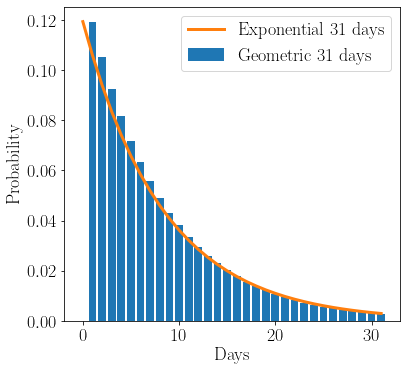

In [10]:
######## Question 1.9 ########

def compare_geometric_and_exponential(p, scale, n):
    fig, axs = plt.subplots(1,1)

    x1 = np.arange(n+1)
    geom = sps.geom.pmf(x1, p=p)
    expon = sps.expon.pdf(x1, scale=scale)
    axs.bar(x1, geom, label=f'Geometric {n} days')
    axs.plot(x1, expon, label=f'Exponential {n} days', color='tab:orange', lw=3)
    axs.set_ylabel("Probability")
    axs.set_xlabel("Days")
    plt.legend()

    plt.tight_layout()

compare_geometric_and_exponential(prob_of_rain, theta, 31)

print("The two distributions compare much more favourably at the end of the xrange than the start")
print("Geometric dist is a pmf because the sample space is discrete: it is the number of trials")
print("it takes to get the first success doing independent Bernoulli experiments")
print("Exponential distribution is the time to wait until the first Poisson success, which")
print("is a continuous distribution, and hence, this is a pdf.")
print("The random variable in the question is the time between two consecutive wet days")
print("Which cannot be a non-integer number, hence, the geometric pmf is a more suitable distribution")

Rain stats: DescribeResult(nobs=15586, minmax=(0.0, 594.4), mean=2.0815475426664958, variance=133.65168515067506, skewness=32.0079975716416, kurtosis=1265.186742788897)
Rain median: 0.0
Rain mode : 0.0
The most common values for the rain are, simply, that there is no rain
The mean value of rain is small, but the variance and shape of the data is highly distorted


Text(0, 0.5, 'Rain (mm)')

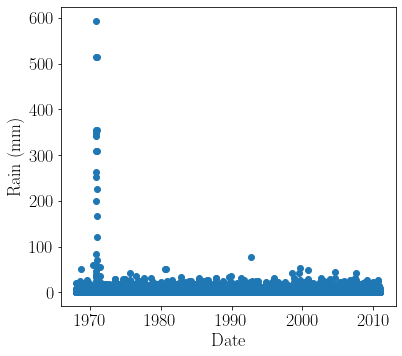

In [11]:
######################################
####### Question 2: Rainfall #########
######################################

######## Question 2.1 ########

# Read data from file
data = np.genfromtxt('raindata.csv', delimiter=',', skip_header=1)
date_data = data[:,0]
rain_data = data[:,1]

# Create copy of original data without invalid results
rain_data_filtered = np.delete(rain_data, np.where(rain_data >= 9999))
date_data_filtered = np.delete(date_data, np.where(rain_data >= 9999))

rain_stats = sps.describe(rain_data_filtered)
rain_median = np.median(rain_data_filtered)
rain_mode = sps.mode(rain_data_filtered)[0][0]

print(f"Rain stats: {rain_stats}")
print(f"Rain median: {rain_median}")
print(f"Rain mode : {rain_mode}")
print("The most common values for the rain are, simply, that there is no rain")
print("The mean value of rain is small, but the variance and shape of the data is highly distorted")

plt.scatter(date_data_filtered, rain_data_filtered)
plt.xlabel("Date")
plt.ylabel("Rain (mm)")

In [12]:
graph_params = {
    'figure.figsize': [11, 5.5],
}
plt.rcParams.update(graph_params)

rain nonzero stats: DescribeResult(nobs=7201, minmax=(0.1, 594.4), mean=4.5053464796556035, variance=278.37863946674076, skewness=22.612604221464455, kurtosis=616.5327223454422)
From the histogram, can see that a large amount of the data is within the 0-5 bucket
which makes sense for both data sets, given that the mean for the full data set is roughly 2 mm
The box plots show much more reasonable spread for the nonzero data. The zero data will extend
down towards zero on this log plot, which is not too helpful or informative.
So, the zero data can significantly affect the stats in a way which isn't useful


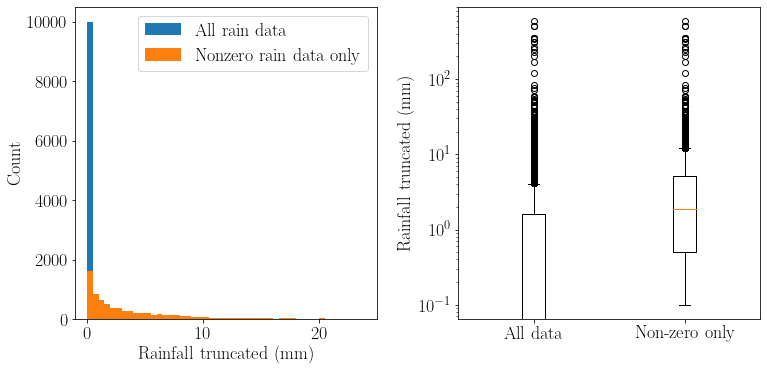

In [13]:
######## Question 2.2 ########

# Get nonzero rainfall data from filtered data
rain_data_filtered_nonzero = rain_data_filtered[np.where(rain_data_filtered > 0.0)]
rain_nonzero_stats = sps.describe(rain_data_filtered_nonzero)
print(f"rain nonzero stats: {rain_nonzero_stats}")

bin_width = 0.5
bins = np.arange(0, 600, bin_width)

fig, axs = plt.subplots(1,2)

axs[0].hist(rain_data_filtered, bins, label='All rain data')
axs[0].hist(rain_data_filtered_nonzero, bins, label='Nonzero rain data only')
axs[0].set_xlabel("Rainfall truncated (mm)")
axs[0].set_ylabel("Count")
axs[0].set_xlim((-1, 25))
axs[0].legend()

axs[1].boxplot([rain_data_filtered, rain_data_filtered_nonzero])
axs[1].set_yscale('log')
axs[1].set_xticklabels(['All data', 'Non-zero only'])
axs[1].set_ylabel("Rainfall truncated (mm)")

plt.tight_layout()

print("From the histogram, can see that a large amount of the data is within the 0-5 bucket")
print("which makes sense for both data sets, given that the mean for the full data set is roughly 2 mm")

print("The box plots show much more reasonable spread for the nonzero data. The zero data will extend")
print("down towards zero on this log plot, which is not too helpful or informative.")
print("So, the zero data can significantly affect the stats in a way which isn't useful")

In [14]:
####### Question 2.3 #######

print("Equating the sample values found above to the gamma distribution parameters gives:")
print(f"Sample mean = {rain_nonzero_stats[2]} = alpha . beta")
print(f"Sample variance = {rain_nonzero_stats[3]} = alpha . beta^2")

print("So, rearranging the first and substituting into the second gives")
beta_mm = np.sqrt(rain_nonzero_stats[3])/rain_nonzero_stats[2]
alpha_mm = rain_nonzero_stats[2]/beta_mm

print(f"Beta = {beta_mm}")
print(f"Alpha = {alpha_mm}")


# TODO: Square rooting the variance gives something much more reasonable
# TODO: Now, alpha_mm is double alpha_mle. Also, beta_mm is half of beta_mle.... hmmm....

Equating the sample values found above to the gamma distribution parameters gives:
Sample mean = 4.5053464796556035 = alpha . beta
Sample variance = 278.37863946674076 = alpha . beta^2
So, rearranging the first and substituting into the second gives
Beta = 3.703307360547519
Alpha = 1.2165737382893074


In [15]:
###### Question 2.4 #######

# Compute alpha and beta using MLE
alpha_mle, beta_mle = ml_gamma(rain_data_filtered_nonzero)
print(f"alpha_mle: {alpha_mle}, beta_mle: {beta_mle}")

alpha_mle: [0.60475002], beta_mle: [7.4499319]


In [16]:
graph_params = {
    'figure.figsize': [6, 5.5],
}
plt.rcParams.update(graph_params)

Moment pdf does not compare very well: this is because alpha and beta are twice and half as
large they should be respectively. The MLE estimator is much closer to the empirical pdf.


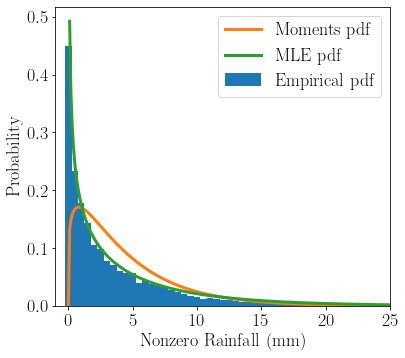

In [17]:
####### Question 2.5 #######

fig, axs = plt.subplots(1)

bin_width = 0.5
bins = np.arange(0, 600, bin_width)
hist, bin_edges = np.histogram(rain_data_filtered_nonzero, bins=bins, density=True)

xrange = np.arange(0, 600, 0.1)
gamma_mm = sps.gamma.pdf(xrange, alpha_mm, 0, beta_mm)
gamma_mle = sps.gamma.pdf(xrange, alpha_mle, 0, beta_mle)

axs.bar(bin_edges[:-1], hist, width=bin_width, label='Empirical pdf')
axs.plot(xrange, gamma_mm, color='tab:orange', lw=3, label='Moments pdf')
axs.plot(xrange, gamma_mle, color='tab:green', lw=3, label='MLE pdf')
axs.set_xlim(-1, 25)
axs.set_xlabel("Nonzero Rainfall (mm)")
axs.set_ylabel("Probability")
axs.legend()

print("Moment pdf does not compare very well: this is because alpha and beta are twice and half as")
print("large they should be respectively. The MLE estimator is much closer to the empirical pdf.")

In [18]:
##################################################
####### Question 3: Confidence Intervals #########
##################################################

###### Question 3.1 ######
mu = 15
sigma = 7

daily_max_temps = [np.random.normal(mu, sigma) for i in range(20)]
print("Normally generated daily max temperatures are:")
print(daily_max_temps)

Normally generated daily max temperatures are:
[17.865430478522804, 17.782126728326244, 11.949304422725952, 12.661011826370649, 23.714100540924356, 22.547327077793092, 4.082515656210198, 14.255536266441338, 21.2083562660142, 15.798493954125806, 14.634715279929113, 23.352887045531304, 21.02911885905442, 5.997463056106479, 12.22590901201808, 26.403732730622515, 24.091817131193615, 19.91145359114585, 21.24099175357266, 10.006287042819931]


In [19]:
graph_params = {
    'figure.figsize': [7, 5.5],
}
plt.rcParams.update(graph_params)

sample mean is: 17.03792893597243


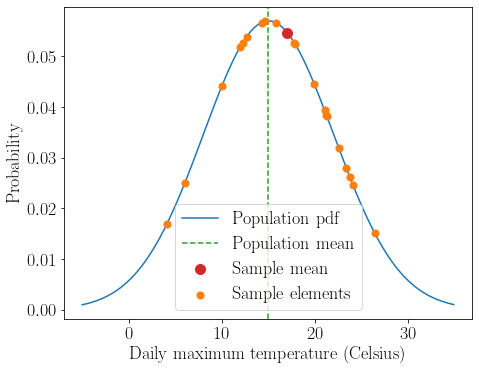

In [20]:
###### Question 3.2 ######
sample_stats = sps.describe(daily_max_temps)
sample_mean = sample_stats[2]
sample_stdev = np.std(daily_max_temps)
print(f"sample mean is: {sample_mean}")

fig, ax = plt.subplots()

# Plot population pdf
xrange = np.arange(-5, 35, 0.1)
pop_pdf = sps.norm.pdf(xrange, mu, sigma)
ax.plot(xrange, pop_pdf, label="Population pdf")

# Draw the true mean
ax.axvline(mu, ls='--', color='tab:green', label="Population mean")

# Draw sample mean
sample_mean_y = sps.norm.pdf(sample_mean, mu, sigma)
ax.scatter(sample_mean, sample_mean_y, color='tab:red', label="Sample mean", s=100, zorder=10)

# Draw sample elements
daily_max_temps_y = []
for element in daily_max_temps:
    daily_max_temps_y.append(sps.norm.pdf(element, mu, sigma))
ax.scatter(daily_max_temps, daily_max_temps_y, color='tab:orange', label='Sample elements', s=50, zorder=9)

# Rest of graph environment
ax.set_xlabel("Daily maximum temperature (Celsius)")
ax.set_ylabel("Probability")
ax.legend()
plt.tight_layout()

In [21]:
# ###### Question 3.3 ######

# # Define some functions to help with generating t values

# # Generate the t distribution for the given sample size
# # u is the range of x values, k is the sample size
# def generate_t_dist(u, k):
#     gamma_num = spsp.gamma((k+1)/2)
#     gamma_denom = spsp.gamma(k/2)
#     denom = np.sqrt(np.pi*k) * (1 + u*u/k)**((k+1)/2)
#     return gamma_num/(gamma_denom*denom)

# # Get the the index of the nearest value in an array to a given value
# def find_nearest_idx(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# # Function which gets t_alpha_half for a given confidence 
# def get_t_alpha_half(confidence):
#     alpha = 1 - confidence

#     # generate t distribution
#     t_dist_x = np.arange(-10, 10, 0.001)
#     t_dist_y = generate_t_dist(t_dist_x, k=len(daily_max_temps)-1)

#     # Get cdf of the distribution
#     t_cum_dist = np.cumsum(t_dist_y)
#     t_cum_dist /= t_cum_dist[-1]

#     # Get the indices closes to 1-alpha/2 in the t-dist cdf
#     t_alpha_half_idx = find_nearest_idx(t_cum_dist, 1-alpha/2)

#     # Finally, get the values of minus and plus t_alpha_half
#     t_alpha_half = t_dist_x[t_alpha_half_idx]

#     return t_alpha_half

# t_dist_x = np.arange(-10, 10, 0.05)
# t_dist_y = generate_t_dist(t_dist_x, k=len(daily_max_temps)-1)

# confidence = 0.5
# alpha = 1-confidence
# t_alpha_half = get_t_alpha_half(confidence)

# print(t_alpha_half)

# t_alpha_half_sps = -sps.t.ppf(alpha/2, len(daily_max_temps)-1)

# plt.axvspan(-t_alpha_half_sps, t_alpha_half_sps, color='tab:green', alpha=0.5)

# # Plot the t-distribution as a sanity check
# # plt.axvspan(-t_alpha_half, t_alpha_half, color='tab:orange', alpha=0.5, label=f'{confidence*100}\% \nconfidence')
# plt.plot(t_dist_x, t_dist_y, zorder=10, label=f't dist for \n k = {len(daily_max_temps)}')
# plt.xlabel("Values")
# plt.ylabel("Probability")
# plt.legend()

for confidence 0.997, lims are 12.427555033841202, 21.64830283810366
for confidence 0.95, lims are 14.200353359616193, 19.87550451232867
for confidence 0.9, lims are 14.693691647387421, 19.38216622455744
for confidence 0.68, lims are 15.653494822613647, 18.422363049331217
Using t distribution to generate confidence bounds [0.997, 0.95, 0.9, 0.68]
These intervals represent the probability that the confidence interval will contain the
population mean, mu
Red is 68% confidence
Orange is 90% confidence
Green is 95% confidence
Blue is 99.7% confidence


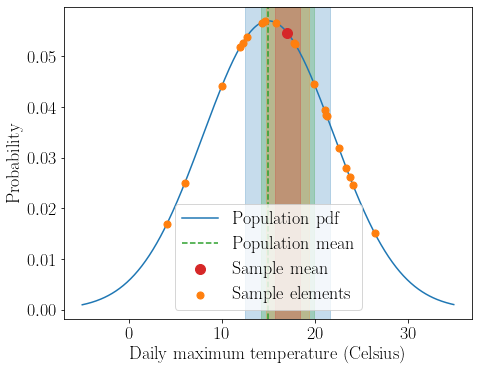

In [22]:
###### Question 3.3 ######

# Now, copy the previous graph
fig, ax = plt.subplots()

# Plot population pdf
pop_pdf = sps.norm.pdf(xrange, mu, sigma)
ax.plot(xrange, pop_pdf, label="Population pdf")

# Draw the true mean
ax.axvline(mu, ls='--', color='tab:green', label="Population mean")

# Draw sample mean
sample_mean_y = sps.norm.pdf(sample_mean, mu, sigma)
ax.scatter(sample_mean, sample_mean_y, color='tab:red', label="Sample mean", s=100, zorder=10)

# Draw sample elements
daily_max_temps_y = []
for element in daily_max_temps:
    daily_max_temps_y.append(sps.norm.pdf(element, mu, sigma))
ax.scatter(daily_max_temps, daily_max_temps_y, color='tab:orange', label='Sample elements', s=50, zorder=9)

# Rest of graph environment
ax.set_xlabel("Daily maximum temperature (Celsius)")
ax.set_ylabel("Probability")
ax.legend()
plt.tight_layout()

# Add to the graph the confidence intervals for 68%, 90%, 95%, 99.7%
confidence_levels = [0.997, 0.95, 0.9, 0.68]
colours = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']

# Use t distribution to generate confidence bounds
for j, conf in enumerate(confidence_levels):
    alpha_conf = 1 - conf
    t_alpha_half = -sps.t.ppf(alpha_conf/2, len(daily_max_temps)-1)
    lower_lim = sample_mean - t_alpha_half*sample_stdev/np.sqrt(len(daily_max_temps))
    upper_lim = sample_mean + t_alpha_half*sample_stdev/np.sqrt(len(daily_max_temps))
    print(f"for confidence {conf}, lims are {lower_lim}, {upper_lim}")
    
    ax.axvspan(lower_lim, upper_lim, color=colours[j], alpha=0.25)

print(f"Using t distribution to generate confidence bounds {confidence_levels}")
print("These intervals represent the probability that the confidence interval will contain the")
print("population mean, mu")

print("Red is 68% confidence")
print("Orange is 90% confidence")
print("Green is 95% confidence")
print("Blue is 99.7% confidence")

Average stdev of all samples is 6.649254513445027
This compares to the population stdev of 7
Interestingly, the sample stdev is usually lower than the population sigma


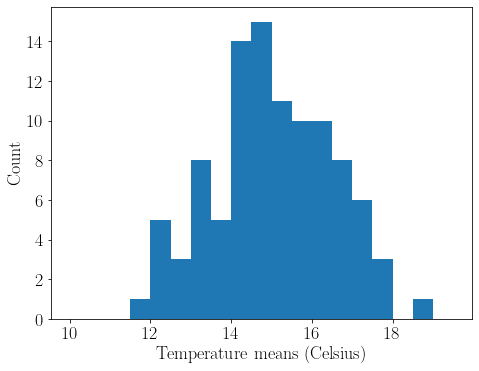

In [23]:
###### Question 3.4 ######

temperature_samples = [[np.random.normal(mu, sigma) for i in range(20)] for j in range(100)]
temperature_means = [np.mean(sample) for sample in temperature_samples]
temperature_stdev = [np.std(sample) for sample in temperature_samples]

temp_mean_stats = sps.describe(temperature_means)

bin_width = 0.5
bins = np.arange(10, 20, bin_width)
plt.hist(temperature_means, bins)
plt.xlabel("Temperature means (Celsius)")
plt.ylabel("Count")
plt.tight_layout()

# Averagre the standard deviations of these samples and compare to population stdev
average_stdev = np.mean(temperature_stdev)
print(f"Average stdev of all samples is {average_stdev}")
print(f"This compares to the population stdev of {sigma}")
print("Interestingly, the sample stdev is usually lower than the population sigma")

In [24]:
graph_params = {
    'figure.figsize': [11, 5.5],
}
plt.rcParams.update(graph_params)

The number of samples with confidence intervals containing mu = 15 are: 90 out of 100
Considering the confidence interval of 0.9, this is as expected


Text(0.5, 0, 'Temperature means (Celsius)')

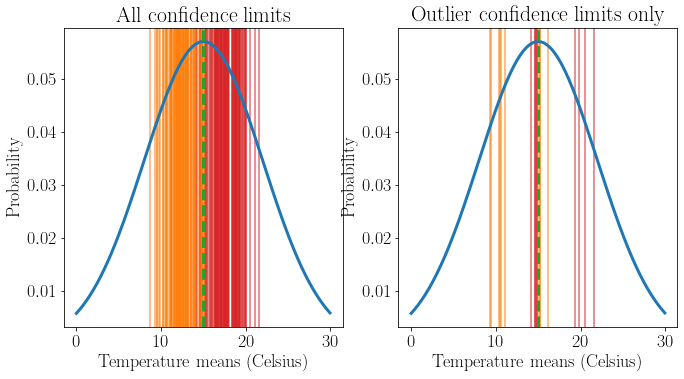

In [25]:
###### Question 3.5 ######

# Compute 90% confidence intervals
confidence = 0.9
alpha = 1 - confidence
t_alpha_half = -sps.t.ppf(alpha/2, len(temperature_samples[0])-1)

confidence_lims = []

for i, sample in enumerate(temperature_samples):
    lower_lim = temperature_means[i] - t_alpha_half*temperature_stdev[i]/np.sqrt(len(sample))
    upper_lim = temperature_means[i] + t_alpha_half*temperature_stdev[i]/np.sqrt(len(sample))
    confidence_lims.append([lower_lim, upper_lim])


# Check if these confidence limits contain mu = 15
# Save the indexes of confidence limits which don't contain mu 
contains_mu = 0
outlier_idxs = []

for i, lims in enumerate(confidence_lims):
    if mu >= lims[0] and mu <= lims[1]:
        contains_mu += 1
    else:
        outlier_idxs.append(i)

print(f"The number of samples with confidence intervals containing mu = 15 are: {contains_mu} out of {len(temperature_samples)}")
print("Considering the confidence interval of 0.9, this is as expected")

# Distribution of means for M=100 is normal about the mean, with variation = sigma
xrange = np.arange(0, 30, 0.05)
max_temp_dist = sps.norm.pdf(xrange, 15, 7)

fig, axs = plt.subplots(1,2)

# Add the real distribution and distribution mean
for ax in axs:
    ax.plot(xrange, max_temp_dist, lw=3, zorder=10)
    ax.axvline(15, color='tab:green', ls='--', lw=3, zorder=10)

for lims in confidence_lims:
    axs[0].axvline(lims[0], lw=2, alpha=0.5, color='tab:orange')
    axs[0].axvline(lims[1], lw=2, alpha=0.5, color='tab:red')

# Plot the outlier confidence intervals on the right plot
for idx in outlier_idxs:
    axs[1].axvline(confidence_lims[idx][0], lw=2, alpha=0.5, color='tab:orange')
    axs[1].axvline(confidence_lims[idx][1], lw=2, alpha=0.5, color='tab:red')

# Finally, add the rest of the stuff to the graph env
axs[0].set_title("All confidence limits")
axs[1].set_title("Outlier confidence limits only")
axs[0].set_ylabel("Probability")
axs[0].set_xlabel("Temperature means (Celsius)")
axs[1].set_ylabel("Probability")
axs[1].set_xlabel("Temperature means (Celsius)")

# TODO: make some horizontal plots instead. 

In [26]:
graph_params = {
    'figure.figsize': [7, 5.5],
}
plt.rcParams.update(graph_params)

Text(0.5, 0, 'Temperature means (Celsius)')

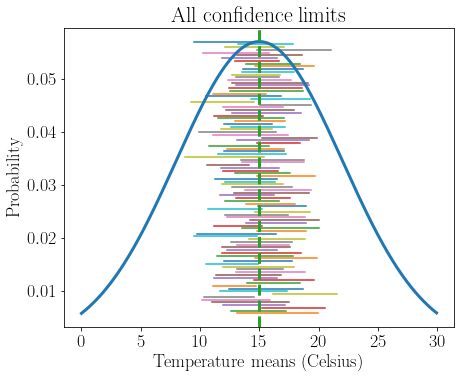

In [27]:
fig, axs = plt.subplots(1)

axs.plot(xrange, max_temp_dist, lw=3, zorder=10)
axs.axvline(15, color='tab:green', ls='--', lw=3, zorder=10)

max_y = np.max(max_temp_dist)
min_y = np.min(max_temp_dist)
y_pos = np.linspace(min_y, max_y, 100)

for i, lims in enumerate(confidence_lims):
    y_coords = [y_pos[i], y_pos[i]]
    axs.plot(lims, y_coords)

# Finally, add the rest of the stuff to the graph env
axs.set_title("All confidence limits")
axs.set_ylabel("Probability")
axs.set_xlabel("Temperature means (Celsius)")